**Add your LiU-ID here:**
* arviv790
* valpa404

### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [3]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 

### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [42]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import AveragePooling2D

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

c:\Users\arvid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

#### **<span style="color:green">Answer:</span>**
X_train:
50000 is the number of training images.
32 and 32 are the width and height of images counted in pixels.
3 are the number of colors channels (red, green, blue).

X_test:
10000 is the number of test images. The rest of the numbers reflect the same attributes as described for X_train.

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

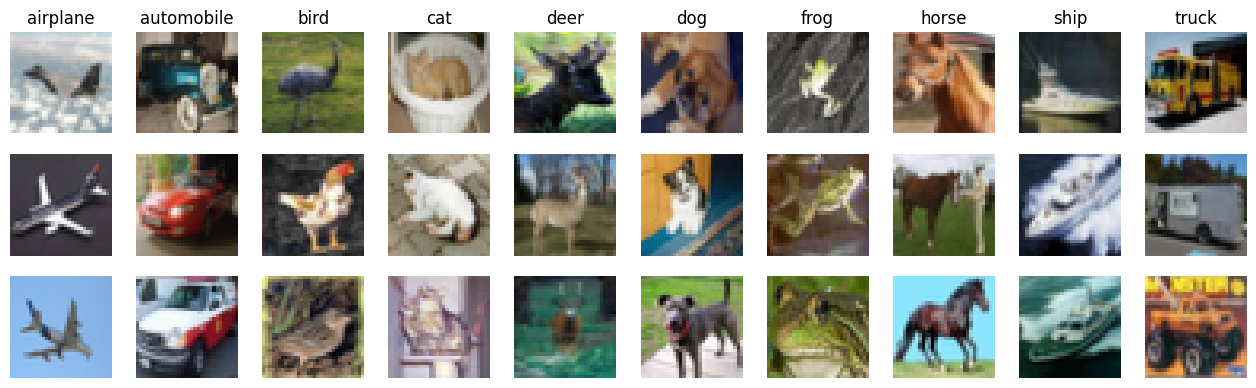

In [8]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [9]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

##### **Training and evaluating the model**
Below, we define a function that performs model training and evaluation. The first input parameter is another function that you will write, that creates and returns the model object in each task.

In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [ ]:
from Custom import PlotModelEval

def TrainModelAndPlotResults(get_model_func, epochs=15, batch_size=32):
    # Get model using function handle parameter
    model = get_model_func()

    # Build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary(100)

    # Train the model and store the training history
    history = model.fit(X_train,y_train_c, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

    # Evaluate on the test set and store the score
    score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

    # Print the result metrics
    print("")
    print('_' * 100)
    for i in range(len(score)):
        print("Test " + model.metrics_names[i] + " = %.3f" % score[i])
    print("")

    # Plot the training history and results
    PlotModelEval(model, history, X_test, y_test, cifar_labels)

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)                 │ (None, 32, 32, 3)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ flatten_4 (Flatten)                        │ (None, 3072)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_12 (Dense)                           │ (None, 128)                     │           393,344 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_13 (Dense)                           │ (None, 64)                      │             8,256 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_14 (Dense)                           │ (None, 10)                      │               650 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3318 - loss: 1.8531 - val_accuracy: 0.3614 - val_loss: 1.7741
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3902 - loss: 1.7031 - val_accuracy: 0.4079 - val_loss: 1.6707
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4110 - loss: 1.6430 - val_accuracy: 0.4001 - val_loss: 1.6823
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4235 - loss: 1.6021 - val_accuracy: 0.4250 - val_loss: 1.6235
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4343 - loss: 1.5746 - val_accuracy: 0.3786 - val_loss: 1.7433
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4406 - loss: 1.5538 - val_accuracy: 0.4370 - val_loss: 1.5872
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4507 - loss: 1.5340 - val_accuracy: 0.4345 - val_loss: 1.5837
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4583 - loss: 1.5133 - 

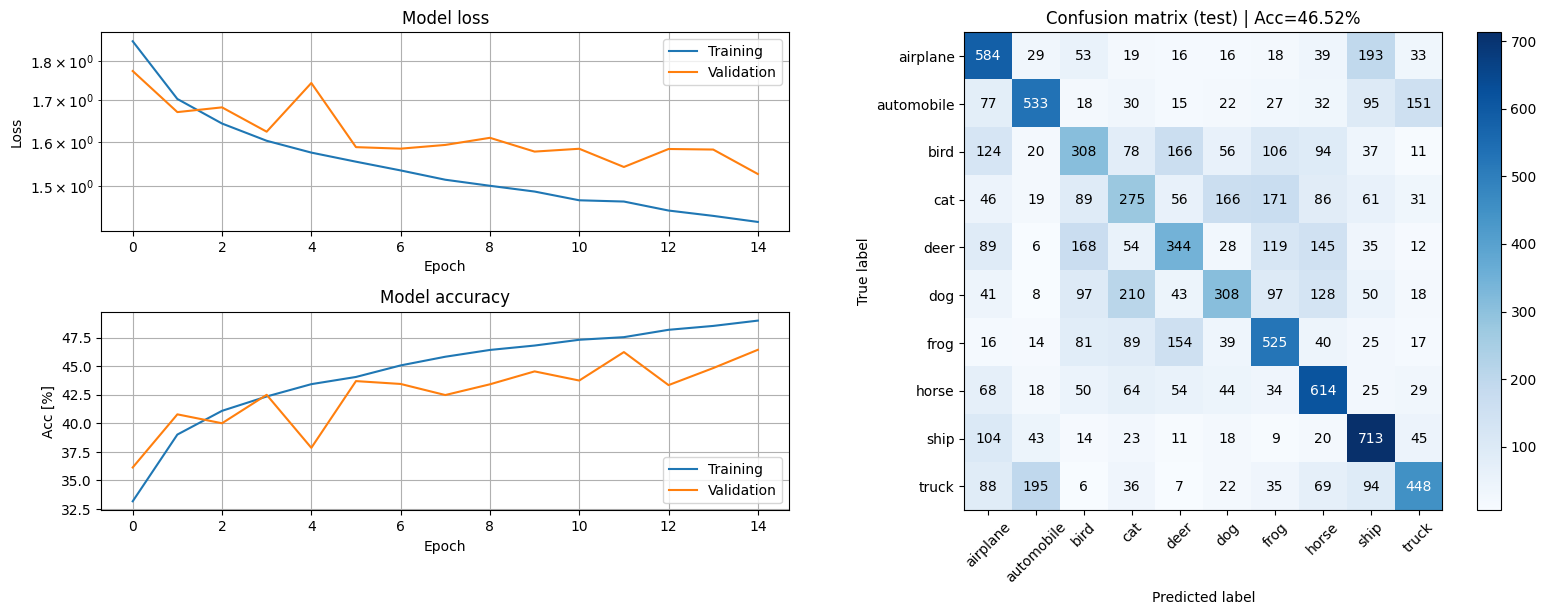

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

def CreateFullyConnectedModel(): 

    x_in = Input(shape=X_train.shape[1:])
    x = Flatten()(x_in)
    
    # --------------------------------------------
    # === Your code here =========================
    # --------------------------------------------
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)
    
    # ============================================
    
    model = Model(inputs=x_in, outputs=x)
    return model

# Run training on the fully connected model
TrainModelAndPlotResults(CreateFullyConnectedModel)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
I chose ReLU for the hidden layers because that makes the hidden layers use non-linearity which seems to work better with image classification than simply using linear activation functions. Also compared to tanh it does not flatten large positive values, meaning we are less likely to get bad gradients when the inputs to the activation functions become too big. I used softmax in the output layer in order to transform the outputs into probabilities with the sum of 1.

I chose the double amount of neurons in the first hidden layer compared to the second because the neurons in the first layer has to find basic features from the input. The second hidden layer can then "combine" these basic features to patterns in order to make a prediction. To choose a reasonable number of neurons for each layer I started with 16 and 8 simply because they are powers of 2 (which feels nice hehe). Then I tried doubling the number of neurons in both hidden layers until I finally reached over 45% test accuracy with 128 and 64 neurons.  Lastly I used 10 neurons in the output layer simply because we want to classify the images into 10 different classes.

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

#### **<span style="color:green">Answer:</span>**
First of all, each sample of the MNIST dataset had 28x28 greyscale pixels while the CIFAR-10 dataset uses 32x32 color pixels with 3 different channels (RGB). This is a more complex problem and therefore requires a more complex model.

Secondly, the model for MNIST only needs to recognize the curves and simple shapes of the digits. In contrast, CIFAR-10 has to recognize the color combinations and shapes that can vary a lot between different pictures within the same class.

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)                 │ (None, 32, 32, 3)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_4 (Conv2D)                          │ (None, 32, 32, 16)              │               448 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_4 (MaxPooling2D)             │ (None, 16, 16, 16)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_5 (Conv2D)                          │ (None, 16, 16, 32)              │             4,640 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_5 (MaxPooling2D)             │ (None, 8, 8, 32)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ flatten_8 (Flatten)                        │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_18 (Dense)                           │ (None, 10)                      │            20,490 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 25,578 (99.91 KB)

 Trainable params: 25,578 (99.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4484 - loss: 1.5496 - val_accuracy: 0.5574 - val_loss: 1.2660
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5875 - loss: 1.1830 - val_accuracy: 0.6004 - val_loss: 1.1530
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6356 - loss: 1.0491 - val_accuracy: 0.6391 - val_loss: 1.0437
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6629 - loss: 0.9698 - val_accuracy: 0.6457 - val_loss: 1.0302
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6795 - loss: 0.9231 - val_accuracy: 0.6572 - val_loss: 0.9938
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6943 - loss: 0.8797 - val_accuracy: 0.6456 - val_loss: 1.0284
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7057 - loss: 0.8494 - val_accuracy: 0.6411 - val_loss: 1.0628
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7124 - loss: 0.

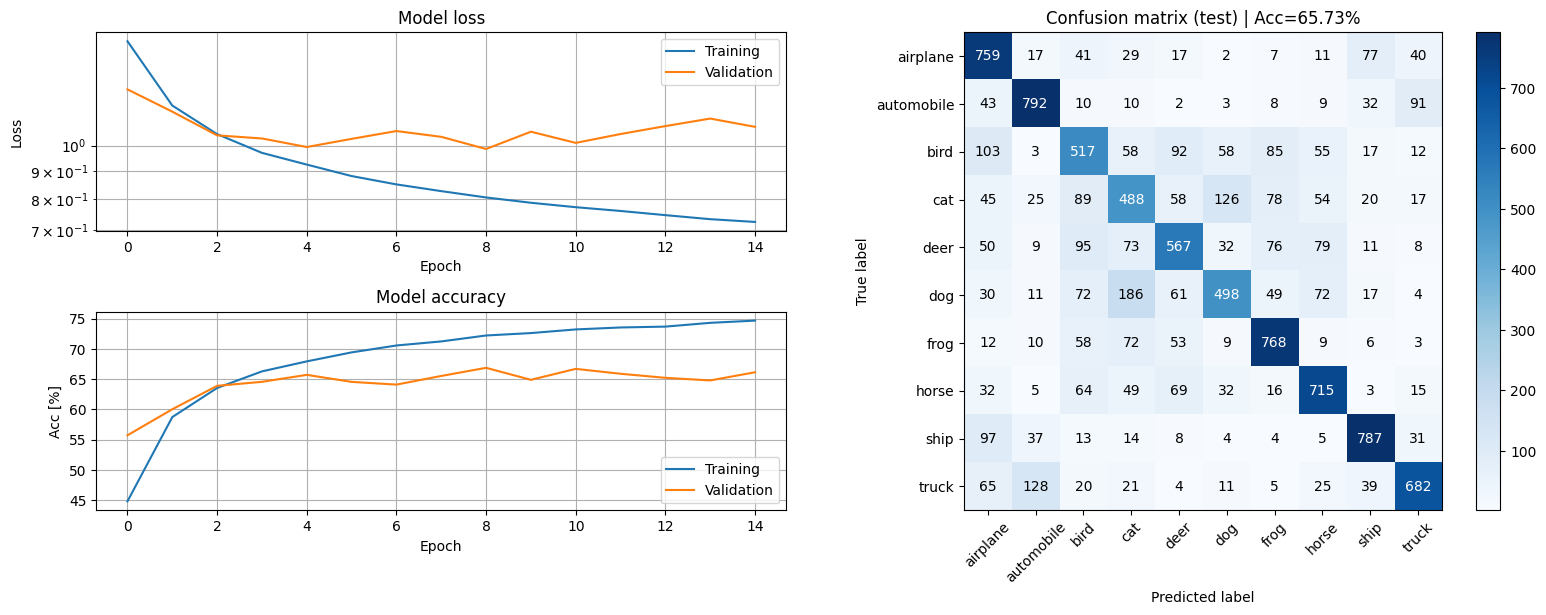

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

def CreateCNNModel():

    x_in = Input(shape=X_train.shape[1:])
    
    # --------------------------------------------
    # === Your code here =========================
    # --------------------------------------------
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x_in)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(10, activation='softmax')(x)
    
    # ============================================
    
    model = Model(inputs=x_in, outputs=x)
    return model

# Run training on the CNN model
TrainModelAndPlotResults(CreateCNNModel)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
We first do a 2D convolution of 16 filters in order to find basic feature patterns like edges and color transitions. Then we do a MaxPooling which compresses the data so that our next convolution with 32 filters can be done using less memory. We then MaxPool once again so that we compress the data once again before flattening (converting feature maps to a vector) and inputing the data into a Dense layer where we use softmax to convert our data into probabilities so our model can do a prediction. I chose the parameters of 16 and 32 because I once again started with small powers of 2 and then tested my way up until I reached 16 and 32, because they had a test accuracy of 65.7%. This is better than the last result probably because we used convolutions and MaxPoolings. However, the problem still seems too complex to be able to solve efficiently with only these techniques or without using a deeper CNN.

#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

#### **<span style="color:green">Answer:</span>**
I would say this is simply because we use a CNN instead of normal NN with Dense layers. What techniques that are the most efficient seem to rely heavily on the problem at hand and convolutions and MaxPooling seem like much more efficient techniques for image recognition. The convolution layers using their filters to create a feature map of patterns seem to work well for images, and also each filter is used for the entire image which reduces the number of parameters compared to the large number of weights needed for a fully-connected NN. 


Also, with our CNN we flatten at the end instead of at the start. I can imagine flattens early make the model lose a bit of "image awareness" because all pixels are seen simply as unrelated numbers instead. This makes our first model worse at seeing patterns, while our second model actually works with the image and its patterns until the flattening at the end.

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after activations in the fully connected potion of the model, while ```SpatialDropout2D``` layers are instead added after the pooling layers in the convolution part of the model. The reason we use ```SpatialDropout2D``` instead of Dropout in the convolution part is that dropping individual nodes in a feature map would destroy the spatial structure of the features. Instead, ```SpatialDropout2D``` drops entire feature maps at a time, preserving the spatial structure within each feature map.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the ```Dropout``` and ```SpatialDropout2D``` layers and test the new performance. Note that good dropout rates are usually different for standard and spatial dropout.

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)                │ (None, 32, 32, 3)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_18 (Conv2D)                         │ (None, 32, 32, 16)              │               448 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_18 (MaxPooling2D)            │ (None, 16, 16, 16)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ spatial_dropout2d_12 (SpatialDropout2D)    │ (None, 16, 16, 16)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_19 (Conv2D)                         │ (None, 16, 16, 32)              │             4,640 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_19 (MaxPooling2D)            │ (None, 8, 8, 32)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ spatial_dropout2d_13 (SpatialDropout2D)    │ (None, 8, 8, 32)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ flatten_15 (Flatten)                       │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_31 (Dense)                           │ (None, 32)                      │            65,568 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_6 (Dropout)                        │ (None, 32)                      │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_32 (Dense)                           │ (None, 10)                      │               330 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 70,986 (277.29 KB)

 Trainable params: 70,986 (277.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3067 - loss: 1.8852 - val_accuracy: 0.4443 - val_loss: 1.5175
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4282 - loss: 1.5656 - val_accuracy: 0.5268 - val_loss: 1.3475
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4755 - loss: 1.4487 - val_accuracy: 0.5681 - val_loss: 1.2440
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5033 - loss: 1.3861 - val_accuracy: 0.5662 - val_loss: 1.2346
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5227 - loss: 1.3352 - val_accuracy: 0.5839 - val_loss: 1.1925
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5397 - loss: 1.2905 - val_accuracy: 0.5933 - val_loss: 1.1714
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5482 - loss: 1.2648 - val_accuracy: 0.6052 - val_loss: 1.1305
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5572 - loss: 1

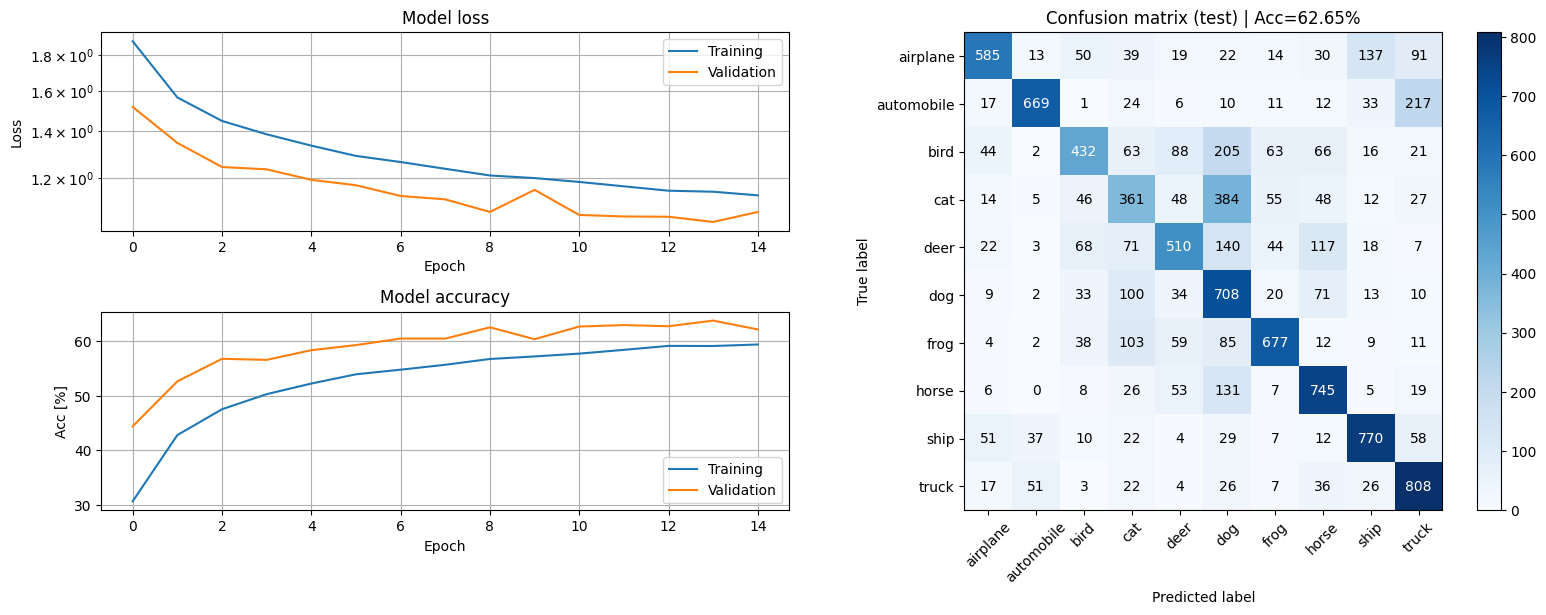

In [ ]:
from tensorflow.keras.layers import Dropout, SpatialDropout2D

def CreateDropoutModel():

    x_in = Input(shape=X_train.shape[1:])
    
    # --------------------------------------------
    # === Your code here =========================
    # --------------------------------------------
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x_in)
    x = MaxPooling2D((2, 2))(x)
    x = SpatialDropout2D(0.1)(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = SpatialDropout2D(0.2)(x) #65% now with lower spatial dropouts
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x) #62% accuracy with 128 neurons, 0.25/0.25 spatial dropout and 0.5 dropout
    x = Dropout(0.25)(x) #0.25 here gave 61% accuracy, 0.5 gives even worse with 32 neurons in previous layer
    x = Dense(10, activation='softmax')(x)

    # ============================================
    
    model = Model(inputs=x_in, outputs=x)
    return model

# Run training on the Dropout model
TrainModelAndPlotResults(CreateDropoutModel)

#### **<span style="color:red">Question 6:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

Hint: what does the dropout layer do at test time?

#### **<span style="color:green">Answer:</span>**
When we add dropouts training accuracy should become lower compared to the traditional CNN. This is because we basically train the model with a handicap in order to make the model unable to simply trust a few strong features. We're implementing so called regularization in order to decrease overfitting, which as said lowers training accuracy. But it also increases validation/test accuracy which is what we really care about, since dropout is only used during training and the full model is used for validation/testing. The architecture otherwise is the same (convolution, pooling, dense layer?????), and they learn similar features. The only difference is that the model with dropout layers in order to learn more general representations and not overly rely on a smaller specific set of neurons.

```Kommentar: Denna förklaring blev lite mer generell och behöver ses över efter du frågat labass om 1 dense-layer ska vara med både i vanlig CNN och CNN med droputs-modellen.```

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)                │ (None, 32, 32, 3)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_46 (Conv2D)                         │ (None, 32, 32, 16)              │               448 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_36                     │ (None, 32, 32, 16)              │                64 │
│ (BatchNormalization)                       │                                 │                   │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ activation_34 (Activation)                 │ (None, 32, 32, 16)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_41 (MaxPooling2D)            │ (None, 16, 16, 16)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ spatial_dropout2d_35 (SpatialDropout2D)    │ (None, 16, 16, 16)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_47 (Conv2D)                         │ (None, 16, 16, 32)              │             4,640 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_37                     │ (None, 16, 16, 32)              │               128 │
│ (BatchNormalization)                       │                                 │                   │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ activation_35 (Activation)                 │ (None, 16, 16, 32)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ max_pooling2d_42 (MaxPooling2D)            │ (None, 8, 8, 32)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ spatial_dropout2d_36 (SpatialDropout2D)    │ (None, 8, 8, 32)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ flatten_23 (Flatten)                       │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_50 (Dense)                           │ (None, 64)                      │           131,136 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_38                     │ (None, 64)                      │               256 │
│ (BatchNormalization)                       │                                 │                   │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ activation_36 (Activation)                 │ (None, 64)                      │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_17 (Dropout)                       │ (None, 64)                      │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_51 (Dense)                           │ (None, 10)                      │               650 │
└────────────────────────────────────────────┴───────────────

 Total params: 137,322 (536.41 KB)

 Trainable params: 137,098 (535.54 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.4247 - loss: 1.5985 - val_accuracy: 0.5370 - val_loss: 1.2827
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.5215 - loss: 1.3392 - val_accuracy: 0.5988 - val_loss: 1.1483
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5566 - loss: 1.2505 - val_accuracy: 0.6017 - val_loss: 1.1317
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5782 - loss: 1.1866 - val_accuracy: 0.6427 - val_loss: 1.0122
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5956 - loss: 1.1416 - val_accuracy: 0.6537 - val_loss: 0.9730
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6135 - loss: 1.1009 - val_accuracy: 0.5623 - val_loss: 1.2188
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6214 - loss: 1.0709 - val_accuracy: 0.6732 - val_loss: 0.9379
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6297 -

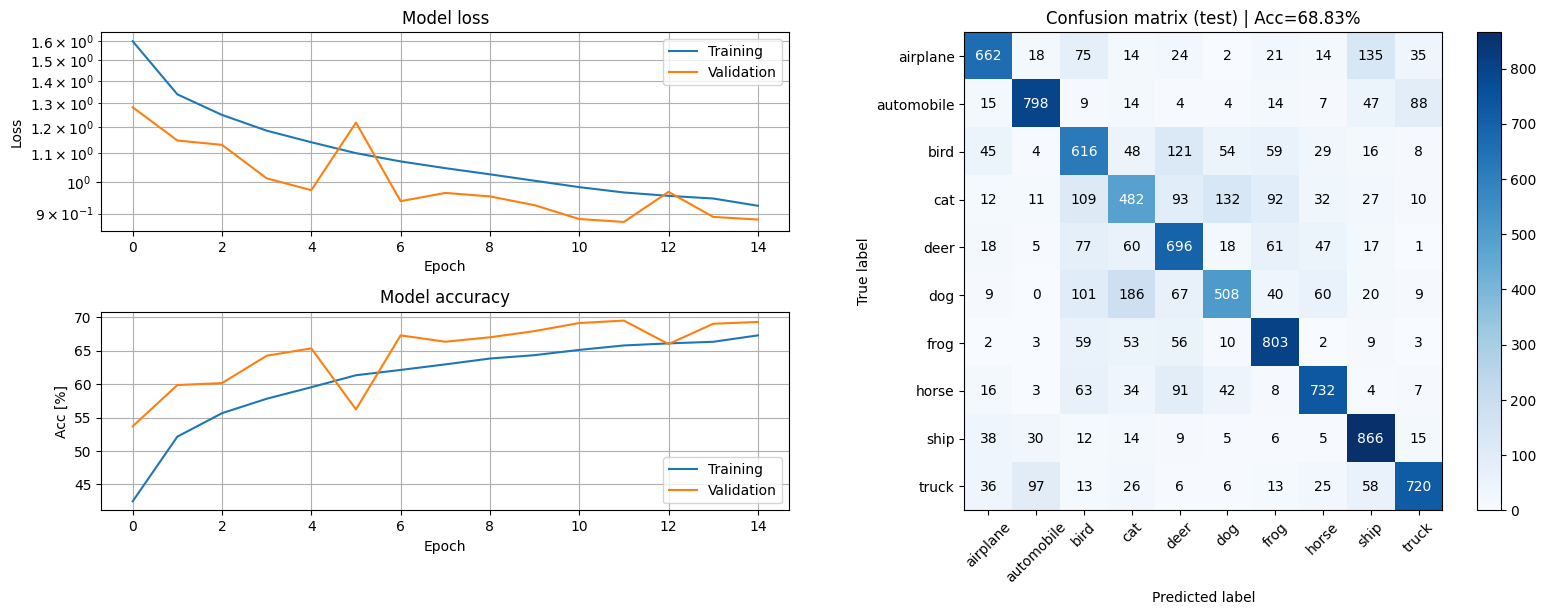

In [38]:
from tensorflow.keras.layers import BatchNormalization, Activation

def CreateBatchNormModel():
    
    x_in = Input(shape=X_train.shape[1:])
    
    # --------------------------------------------
    # === Your code here =========================
    # --------------------------------------------
    x = Conv2D(16, (3, 3), padding='same')(x_in)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = SpatialDropout2D(0.1)(x)

    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = SpatialDropout2D(0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    x = Dense(10, activation='softmax')(x)
    
    
    # ============================================
    
    model = Model(inputs=x_in, outputs=x)
    return model

# Run training on the BatchNorm model
TrainModelAndPlotResults(CreateBatchNormModel)

#### **<span style="color:red">Question 7:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if:

1. The minibatch size is too small.
2. The minibatch size is too large.

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

#### **<span style="color:green">Answer:</span>**
1. If the minibatch size is too small we may get longer training times, because of the calculations becoming less efficient than when using bigger minibatch sizes. The gradients can also become unreliable with a small minibatch size. Training with too few samples can create skewed means and standard deviations during normalizations, which may also affect our gradients.

2. If the minibatch size is too large we increase the risk of making our model less generalizable. The lack of random variation that smaller minibatches bring, can make us end up in bad local minimas and thus worsening model performance. Also too big minibatches also take up more memory than smaller minibatches. 

I used the following master's thesis as source:
https://arxiv.org/pdf/1707.09725

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)                │ (None, 32, 32, 3)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_52 (Conv2D)                         │ (None, 32, 32, 32)              │               896 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_44                     │ (None, 32, 32, 32)              │               128 │
│ (BatchNormalization)                       │                                 │                   │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ activation_42 (Activation)                 │ (None, 32, 32, 32)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ average_pooling2d_3 (AveragePooling2D)     │ (None, 16, 16, 32)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ spatial_dropout2d_40 (SpatialDropout2D)    │ (None, 16, 16, 32)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_53 (Conv2D)                         │ (None, 16, 16, 64)              │            18,496 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_45                     │ (None, 16, 16, 64)              │               256 │
│ (BatchNormalization)                       │                                 │                   │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ activation_43 (Activation)                 │ (None, 16, 16, 64)              │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ average_pooling2d_4 (AveragePooling2D)     │ (None, 8, 8, 64)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ spatial_dropout2d_41 (SpatialDropout2D)    │ (None, 8, 8, 64)                │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ conv2d_54 (Conv2D)                         │ (None, 8, 8, 128)               │            73,856 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ batch_normalization_46                     │ (None, 8, 8, 128)               │               512 │
│ (BatchNormalization)                       │                                 │                   │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ activation_44 (Activation)                 │ (None, 8, 8, 128)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ average_pooling2d_5 (AveragePooling2D)     │ (None, 4, 4, 128)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ spatial_dropout2d_42 (SpatialDropout2D)    │ (None, 4, 4, 128)               │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ flatten_25 (Flatten)                       │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼───────────────

 Total params: 226,186 (883.54 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 45ms/step - accuracy: 0.3874 - loss: 1.6888 - val_accuracy: 0.4725 - val_loss: 1.4536
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.4812 - loss: 1.4420 - val_accuracy: 0.5551 - val_loss: 1.2476
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.5298 - loss: 1.3114 - val_accuracy: 0.6026 - val_loss: 1.1340
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 46ms/step - accuracy: 0.5705 - loss: 1.2071 - val_accuracy: 0.6414 - val_loss: 1.0280
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.6027 - loss: 1.1227 - val_accuracy: 0.6736 - val_loss: 0.9330
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 43ms/step - accuracy: 0.6229 - loss: 1.0687 - val_accuracy: 0.6824 - val_loss: 0.9069
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - accuracy: 0.6388 - loss: 1.0273 - val_accuracy: 0.6774 - val_loss: 0.9110
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.6535 -

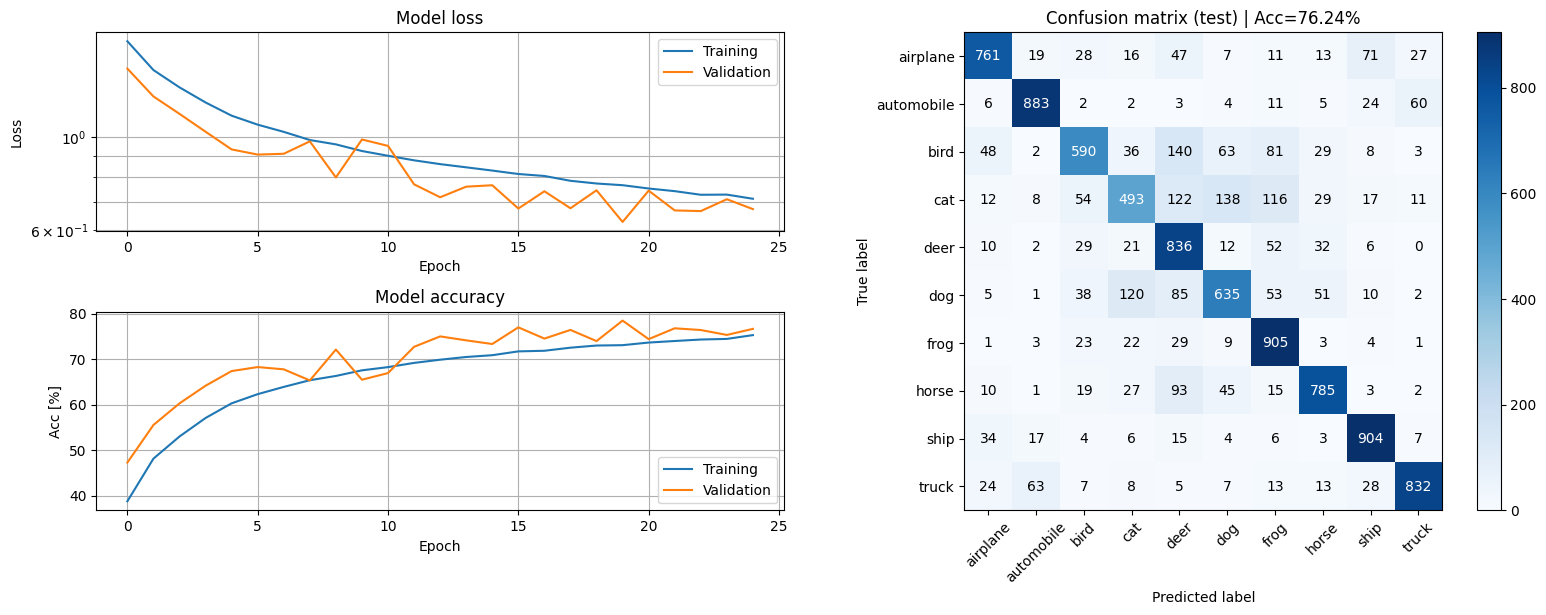

In [ ]:
def CreateFinalModel():

    x_in = Input(shape=X_train.shape[1:])
    
    # --------------------------------------------
    # === Your code here =========================
    # --------------------------------------------
    x = Conv2D(32, (3, 3), padding='same')(x_in)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D((2, 2))(x)
    x = SpatialDropout2D(0.1)(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D((2, 2))(x)
    x = SpatialDropout2D(0.2)(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D((2, 2))(x)
    x = SpatialDropout2D(0.3)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    x = Dense(10, activation='softmax')(x)
    
    """ RESULTS
    70% accuracy with 2 conv layers, 2 dense layers (output layer excluded)
    74.8% accuracy with 3 conv layers, 1 dense layer (output layer excluded)
    76.4% accuracy with 6 conv layers (2 convolutions before each pooling), 1 dense layer (output layer excluded)
    77% accuracy with 3 conv layers and double amount of kernels, one 128-neuron dense layer (output layer excluded)
    76.2% accuracy when using the same architecture as above, but with 64-neuron Dense layer and average pooling instead of max
    78.2% accuracy exactly the same, but with 128-neuron Dense layer

    """
    # ============================================
    
    model = Model(inputs=x_in, outputs=x)
    return model

# Run training on the final model
TrainModelAndPlotResults(CreateFinalModel, epochs=25)

#### **<span style="color:red">Question 8:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Explain your model architecture and motivate the design choices you have made.

#### **<span style="color:green">Answer:</span>**
The model I ended up with that had the highest test accuracy (78.2%) was using 3 convolution blocks and 1 dense block. Each convolution block consists of

    Convolution --> Batch normalization --> ReLU activation --> Mean pooling --> Spatial dropout

In the first convolution block I had 32 kernels which then was increased to 64 and 128 kernels for the second and third block respectively. Similarly, I used 0.1 dropout in the first block which was then increased to 0.2 and 0.3. Then at the end I used a fully connected block that looked like

    Flatten --> Dense layer --> Batch normalization --> ReLU activation --> Dropout

The dense layer had 128 neurons and the dropout was set to 0.25 as a middleground. We then finally feed this into the output layer with 10 neurons (because of there being 10 classes) and softmax to convert the output into predicted probabilities.


The reason I chose to design my model the way I did was a combination of intuition learned from the course material and just testing what works best. If you look at my comment saying "RESULTS" in the code above you will see some tests I did to see what works and not. One thing I learned is that increasing the amount of Dense layers didn't really make too big of a difference. Increasing the number of neurons or Dense layers did improve the model slightly, but compared to how much longer training time that was needed it was obvious that this wasn't the most efficient solution.

Instead, adding more convolution layers seems to much more rapidly increase performance. I tried adding more convolution layers (i.e. 6 in total) but still keep the number of kernels between 16-64 which did improve results, but what really seemed to work the best was having 3 convolution layers with 32-128 kernels. This also seems to be in line with the theory discussed in the lectures. To convert a sample image into only 16 feature maps is not enough to extract enough characteristic features, and it seems reasonable that having at least 32 kernels in the first convolution layer is necessary for the model to learn the abstract features the CIFAR-10 dataset has. The reason mean pooling was chosen instead of max pooling is simply out of testing, as mean pooling had slightly better performance. For the Denser layer 128 neurons were chosen simply because of testing, as lower numbers didn't seem to be enough.

---

### **Want some extra challenge?**
For those of you that want to get creative, here are some things to look into. But note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).